# World Happiness Report Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier




In [2]:
df=pd.read_csv('C:\\Users\Ankit Singh\Downloads\happiness_score_dataset.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
df.shape

(158, 12)

In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

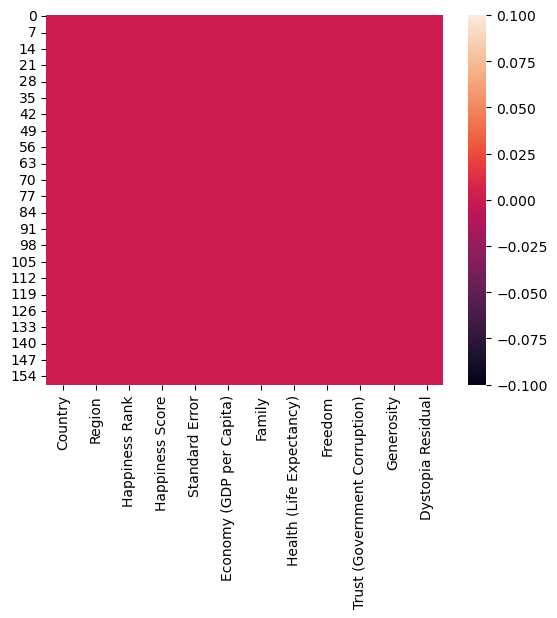

In [9]:
sns.heatmap(df.isnull())

In [10]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


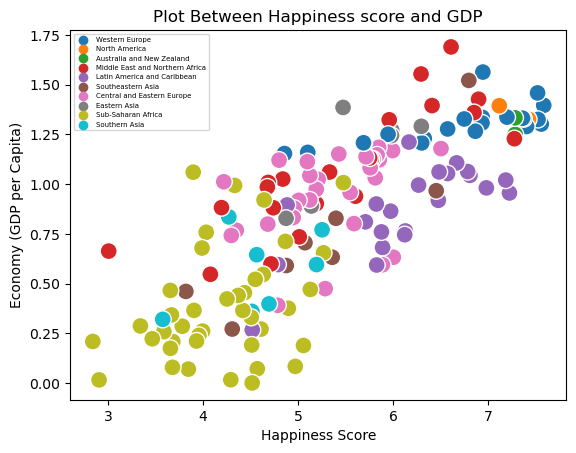

In [12]:
#plot between happiness and GDP
plt.title('Plot Between Happiness score and GDP')
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df,hue='Region',s=150)
plt.legend(loc='upper left', fontsize='5')

Here countries from western europe have highest happiness score as well as GDP per capita where as region of sub saharan africa have lowest happuness score.


In [14]:
GDP_Region=df.groupby('Region')['Economy (GDP per Capita)'].sum()

In [15]:
GDP_Region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0.5, 1.0, 'Region(GDP Per Capita) ')

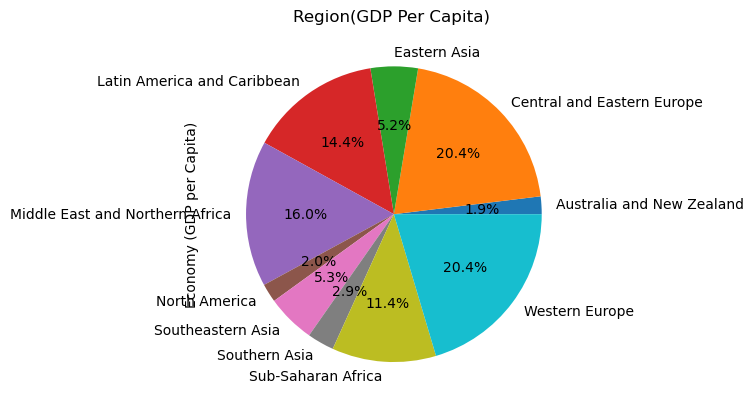

In [16]:
GDP_Region.plot.pie(autopct='%1.1f%%')
plt.title('Region(GDP Per Capita) ')

Here ,GDP per capita is high for western Europe and central and Eastern Europe wheare as low for North America and Southern Asia

In [17]:
#Total Countries
total_country=df.groupby('Region')[['Country']].count()

In [18]:
total_country

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


<AxesSubplot:>

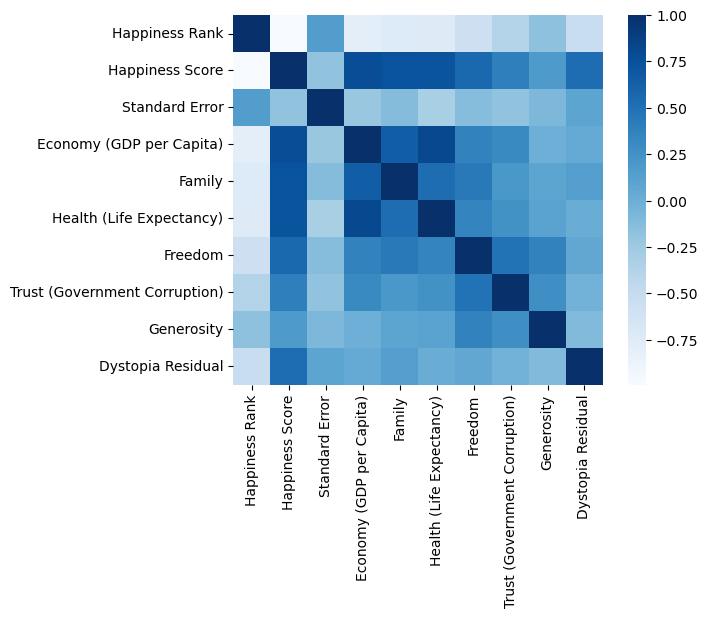

In [19]:
#correlatuion map
corr=df.corr(method="pearson")
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap='Blues',square=True)

there is high correlation between hapiness score and gdp per capita,Family,health,but low at dystopia residual,Generosity.

In [20]:
trust=df.groupby('Region')[['Trust (Government Corruption)']].mean()

In [21]:
trust

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


In [22]:
region=('Australia and New Zealand',
'Central and Eastern Europe',
'Eastern Asia',
'Latin America and Caribbean',
'Middle East and Northern Africa',
'North America',
'Southeastern Asia',
'Southern Asia',
'Sub-Saharan Africa',
'Western Europe')

In [23]:
Trust_Index=(0.392795,0.086674,0.127695,0.117172,0.181702,0.244235,0.151276,0.102536,0.123878,0.231463)

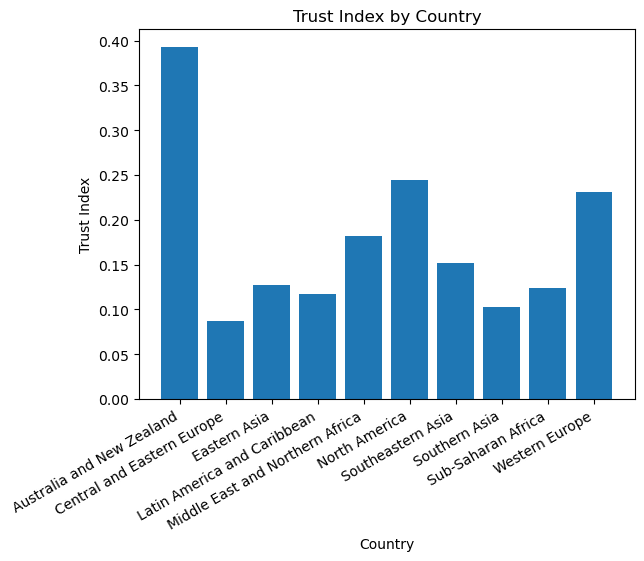

In [24]:
plt.bar(region, Trust_Index)
plt.title('Trust Index by Country')
plt.xlabel('Country')
plt.ylabel('Trust Index')
plt.xticks(rotation=30,ha='right')
plt.show()

here Australia and newzealand have high trust value and central and eastern europe have low trust value.

In [25]:
top_10=df.head(10)
bottom_10=df.tail(10)

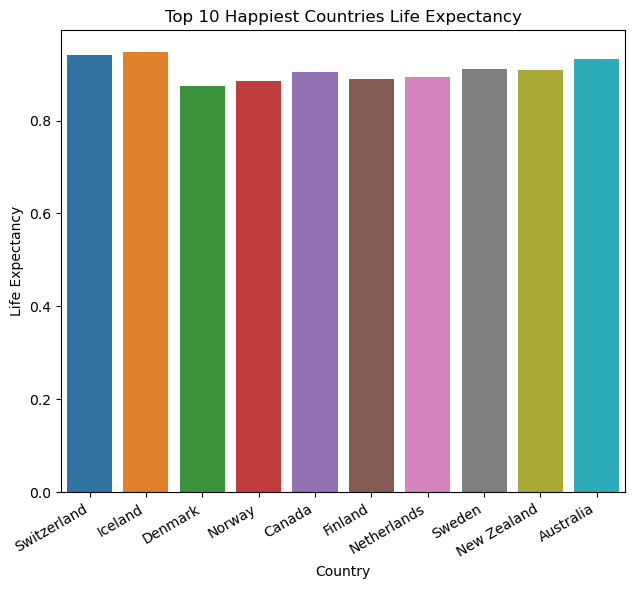

In [26]:



fig = plt.figure(figsize=(16, 6))

# Add a subplot to the figure
axes = fig.add_subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
sns.barplot(x=top_10.Country, y=top_10['Health (Life Expectancy)'], ax=axes)
axes.set_title('Top 10 Happiest Countries Life Expectancy')
axes.set_xlabel('Country')
axes.set_ylabel('Life Expectancy')

plt.xticks(rotation=30,ha='right')

plt.show()


In [27]:
these are top 10 happiest countries.

SyntaxError: invalid syntax (1915014119.py, line 1)

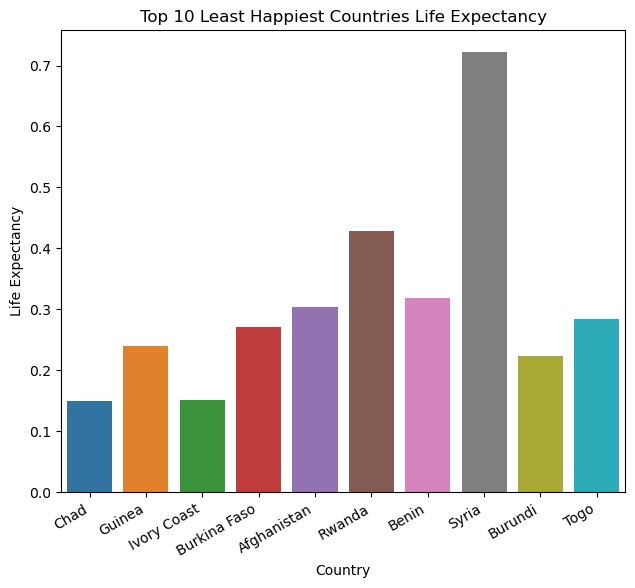

In [28]:
fig = plt.figure(figsize=(16, 6))

# Add a subplot to the figure
axes = fig.add_subplot(1, 2, 1)  
sns.barplot(x=bottom_10.Country, y=bottom_10['Health (Life Expectancy)'], ax=axes)
axes.set_title('Top 10 Least Happiest Countries Life Expectancy')
axes.set_xlabel('Country')
axes.set_ylabel('Life Expectancy')

plt.xticks(rotation=30,ha='right')

plt.show()


these are bottom 10 least happeist country.

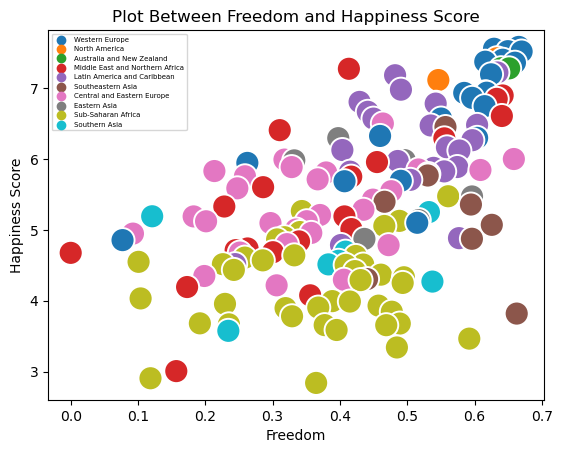

In [29]:
plt.title('Plot Between Freedom and Happiness Score')
sns.scatterplot(x='Freedom',y='Happiness Score',data=df,hue='Region',s=300)
plt.legend(loc='upper left', fontsize='5')

<BarContainer object of 10 artists>

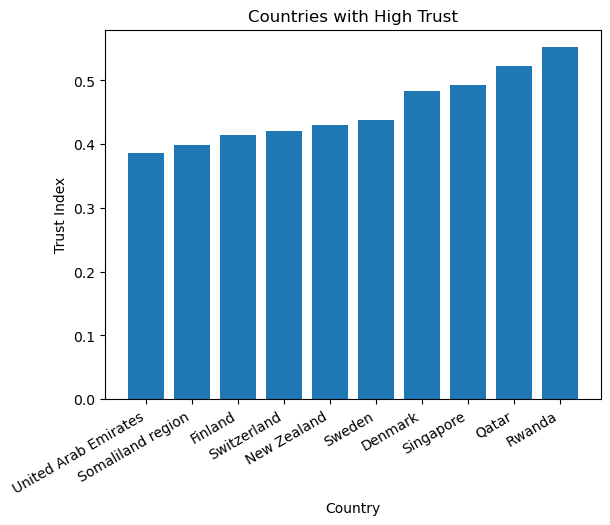

In [30]:
country=df.sort_values(by='Trust (Government Corruption)').tail(10)
plt.title('Countries with High Trust')
plt.xlabel('Country')
plt.ylabel('Trust Index')
plt.xticks(rotation=30,ha='right')
plt.bar(country.Country, country['Trust (Government Corruption)'])




In [31]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [32]:
from scipy.stats import zscore

# Identify numeric columns (excluding non-numeric or string columns)
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate z-scores only for numeric columns
z_scores = zscore(df[numeric_columns])

# Set the threshold for identifying outliers
threshold = 3

# Find and print the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)
print("Indices of outliers:", outlier_indices)



Indices of outliers: (array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [33]:
df.shape

(158, 12)

# Seperating the Columns into Features and Target

In [34]:
X=df.drop('Happiness Score',axis=1)
X

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [35]:
Y=df['Happiness Score']

In [36]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

# Model Training

Logistic Regression

In [37]:
X = pd.get_dummies(df.drop(columns=['Happiness Score']))
Y = df['Happiness Score']


In [38]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
    

In [39]:
model=LogisticRegression()

In [40]:
model.fit=(X_train, Y_train)

In [41]:
df.dtypes


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Model Evaluation

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Now  use these regression models
rf = RandomForestRegressor(n_estimators=100)
svr = SVR()
dtc = DecisionTreeRegressor()
ad = AdaBoostRegressor()


# Create the regression model
model = LinearRegression()

# Fit the model to  training data
model.fit(X_train, Y_train)

LinearRegression()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error: 0.08896142390284331
Mean Squared Error: 0.011435426524047946
R-squared (R²): 0.992311013436912


In [44]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')

 Error of  RandomForestRegressor() :
Mean absolute error : 0.03723625000000011
Mean squared error : 0.002820840287500014
Root Mean Squared Error: 0.053111583364648565


 R2 Score :
0.9981033149028946


 Error of  SVR() :
Mean absolute error : 0.06876458439386562
Mean squared error : 0.0073558364030774075
Root Mean Squared Error: 0.0857661728368324


 R2 Score :
0.995054060542071


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.058312499999999975
Mean squared error : 0.005915687499999999
Root Mean Squared Error: 0.07691350661619843


 R2 Score :
0.99602239220345


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.07227493784299609
Mean squared error : 0.007730371920998535
Root Mean Squared Error: 0.08792253363614208


 R2 Score :
0.9948022292213382




In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a Linear Regression model
lin_regression = LinearRegression()

# Fit the model to  data
lin_regression.fit(X_train, Y_train)

#  cross-validation or predictions
score = cross_val_score(lin_regression, X, Y, cv=5)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [0.38802974 0.65349553 0.8431106  0.55210194 0.77990247]
Mean Score : 0.6433280562136655
Std deviation : 0.1625844094109446


# Saving model

In [49]:
import joblib
joblib.dump(lin_regression,'lin_regression.obj')
['lin_regression.obj']

['lin_regression.obj']